In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

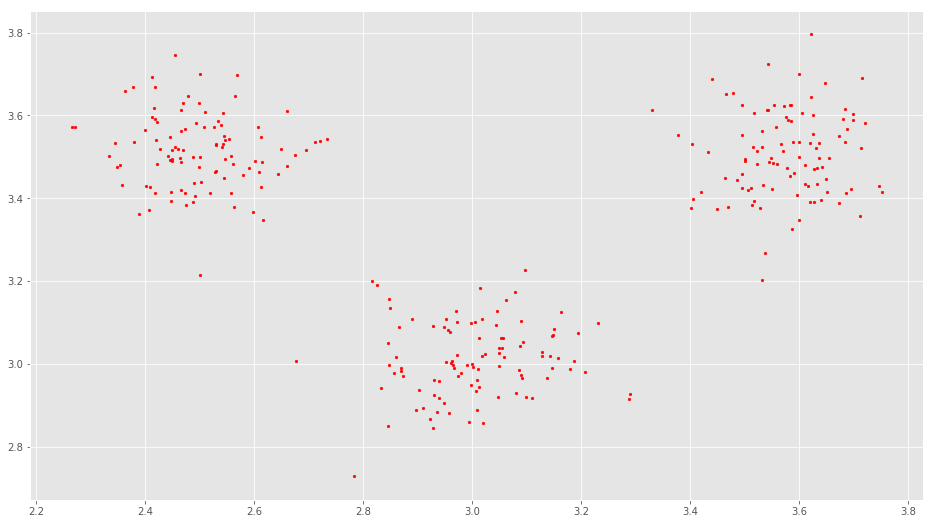

In [79]:
x = np.array([[2.5,3.5],[3,3],[3.6,3.5]])
fig, ax = plt.subplots()
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in x:
    for j in range(100): #generate gaussian distributed points around the centers
        delta = np.random.randn(2)*.1
        x = np.append(x,[i+delta], axis = 0)
ax.scatter(x[:, 0], x[:, 1], s=7, c=colors[0])

[[ 2.55  3.56]
 [ 2.9   3.1 ]
 [ 3.65  3.55]
 [ 0.    1.  ]]


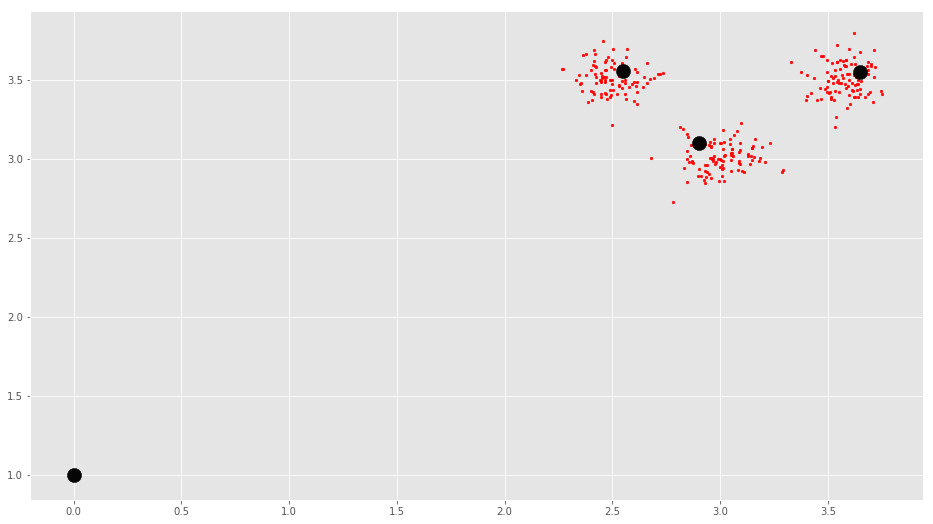

In [80]:
# centers = np.zeros((3,2))
# for i in range(3):
#     centers[i] = x[np.random.randint(0,x.shape[0])]#随机抽取三个点作为起点
centers = np.array([[2.55,3.56],[2.9,3.1],[3.65,3.55],[0,1]])
print(centers)
#ax.scatter(x[:, 0], x[:, 1], s=7, c=colors[0])
ax.scatter(centers[:, 0], centers[:, 1], marker='o', s=200, c='#050505')
fig

In [156]:
class Kmeans:
    def __init__(self):
        self.centers = None
        self.cluster_to_point = None
    def dist(self, a, b, ax=1):
        return np.linalg.norm(a - b, axis=ax)
    def compute(self, k, dim, x, init_centers = None, epsilon = 1e-10):
        if init_centers == None:
            self.centers = np.zeros((k,dim))
            for i in range(k):
                self.centers[i] = x[np.random.randint(0,x.shape[0])]#随机抽取三个点作为起点
        else:
            self.centers = np.array(init_centers)
        centers_update = np.zeros((k,dim))
        residue = self.dist(centers_update, self.centers, None)
        print(residue)
        self.cluster_to_point = [[] for i in range(k)]        
        while residue > epsilon:
            for i in range(len(x)): ##3000个instance
                distances = self.dist(x[i], centers) #返回X[i]与C(三个中心点)的距离
                cluster = np.argmin(distances) #返回最小的那个距离的index
                point_to_cluster[tuple(x[i])] = cluster
                self.cluster_to_point[cluster].append(x[i].tolist())

            centers_update = np.zeros((k,dim))
            for i in range(k):
                centers_update[i] = np.mean(self.cluster_to_point[i], axis = 0)
            residue = dist(centers_update, self.centers, None)
            print(residue)
            self.centers = centers_update
    def check_radius(self):
        radius = []
        for i in range(len(self.centers)):
            if(len(self.cluster_to_point[i]) != 0):
                radius.append(max(dist(self.cluster_to_point[i], self.centers[i])))
        #print(self.cluster_to_point.keys())
        return radius
    def get_centers(self):
        return self.centers
        

In [157]:
centers

array([[ 2.49789682,  3.51443235],
       [ 3.00536575,  3.01142499],
       [ 3.57485075,  3.50638914],
       [ 0.        ,  0.        ]])

In [158]:
import warnings
warnings.filterwarnings("ignore")
kmeans = Kmeans()
kmeans.compute(4, 2, x)

9.26655091666
nan


In [159]:
kmeans.get_centers()

array([[ 2.49789682,  3.51443235],
       [ 3.00536575,  3.01142499],
       [ 3.57485075,  3.50638914],
       [        nan,         nan]])

In [160]:
kmeans.check_radius()

[0.29843787104981018, 0.35929204792532266, 0.30668755262584246]

In [161]:
kmeans.cluster_to_point

[[[2.5, 3.5],
  [2.3486193000705593, 3.4747164870229734],
  [2.6006650644285756, 3.490061402054606],
  [2.5299398028731073, 3.4662221583822768],
  [2.732840696179516, 3.543301155060202],
  [2.2712512834793928, 3.573091129504246],
  [2.711531929102632, 3.5364645590645565],
  [2.4696859611365745, 3.5178065606295483],
  [2.4169019016754048, 3.4124288940501164],
  [2.4986197539951007, 3.4746107998293128],
  [2.498666316828762, 3.62931859257721],
  [2.422164447747365, 3.481983545575991],
  [2.422068072363928, 3.584410726953922],
  [2.4647095912520713, 3.4200530113577536],
  [2.460303766991807, 3.5187990963616023],
  [2.579169657722321, 3.455350272416233],
  [2.4889060275253305, 3.437110848508634],
  [2.5006291542851757, 3.699217842380102],
  [2.2645274074796666, 3.571245019062914],
  [2.3993441501079933, 3.5656196690690276],
  [2.4646718673807544, 3.5627072592930236],
  [2.419864252432765, 3.541246551028506],
  [2.5621631310787114, 3.3782721347641416],
  [2.466205118603717, 3.48817304000763

In [150]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

point_to_cluster = {}
cluster_to_point = [[] for i in range(4)]
centers_update = np.zeros((4,2))
residue = dist(centers_update, centers, None)
while residue > .001:
    for i in range(len(x)): ##3000个instance
        distances = dist(x[i], centers) #返回X[i]与C(三个中心点)的距离
        cluster = np.argmin(distances) #返回最小的那个距离的index
        point_to_cluster[tuple(x[i])] = cluster
        cluster_to_point[cluster].append(x[i].tolist())
        
    centers_update = np.zeros((4,2))
    for i in range(3):
        centers_update[i] = np.mean(cluster_to_point[i], axis = 0)
    residue = dist(centers_update, centers, None)
    print(residue)
    centers = centers_update

0.0


In [86]:
points = np.array(cluster_to_point[0])
points[:,0]

array([ 2.5       ,  2.3486193 ,  2.60066506,  2.5299398 ,  2.7328407 ,
        2.27125128,  2.71153193,  2.46968596,  2.4169019 ,  2.49861975,
        2.49866632,  2.42216445,  2.42206807,  2.46470959,  2.46030377,
        2.57916966,  2.48890603,  2.50062915,  2.26452741,  2.39934415,
        2.46467187,  2.41986425,  2.56216313,  2.46620512,  2.34510855,
        2.5302789 ,  2.52661242,  2.41600363,  2.56367594,  2.6120088 ,
        2.47429181,  2.3771412 ,  2.65983341,  2.59821851,  2.6058565 ,
        2.64276759,  2.50045328,  2.35332009,  2.44615218,  2.42608191,
        2.53036385,  2.47243162,  2.61263978,  2.41200204,  2.35727586,
        2.40024149,  2.45373009,  2.69410556,  2.60841126,  2.50792104,
        2.47752948,  2.55649797,  2.44556209,  2.40588822,  2.49148008,
        2.52853071,  2.46342023,  2.54440767,  2.38781219,  2.54598341,
        2.37943119,  2.54316527,  2.47189907,  2.54190203,  2.50864019,
        2.44803537,  2.59073324,  2.54631281,  2.5329944 ,  2.65

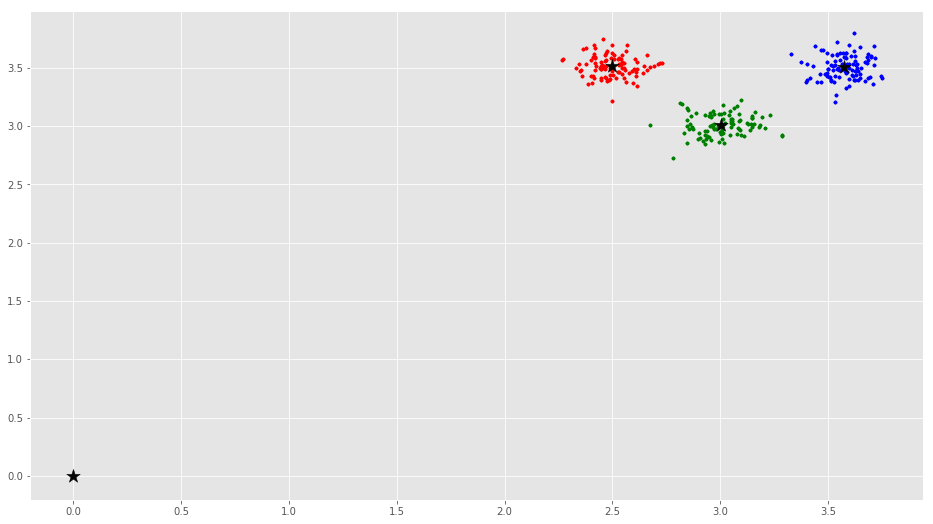

In [87]:
# fig, ax = plt.subplots()
# ax.scatter(x[:, 0], x[:, 1], s=7, c=colors[0])
# ax.scatter(centers[:, 0], centers[:, 1], marker='o', s=200, c='#050505')
fig, ax = plt.subplots()

for i in range(3):    
    points = np.array(cluster_to_point[i])
    ax.scatter(points[:,0],points[:,1], s = 10, c = colors[i])
    #ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
#ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='#050505')


In [88]:
centers

array([[ 2.49789682,  3.51443235],
       [ 3.00536575,  3.01142499],
       [ 3.57485075,  3.50638914],
       [ 0.        ,  0.        ]])

In [63]:
def foo(x, arr = None):
    if arr == None:
        print(x)
    else:
        print(arr)
arr = np.array([1,2,3])
foo(1,arr)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()